# Multiple Linear Regression
#### In this linear regression we'll build a Lenear regression to predict demand for bike sharing 

## Step 1: Reading and understanding the data
1. We'll import the data using pandas
2. Understanding the structure of the data


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [155]:
boom_bikes = pd.read_csv('day.csv')
#boom_bikes.head()

In [156]:
boom_bikes['time']=boom_bikes['instant'].apply(lambda x:x/len(boom_bikes))
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0.001370
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.002740
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.004110
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.005479
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.006849


In [157]:
#We'll add time column instead of Data.
boom_bikes=boom_bikes.drop(['dteday','casual','registered','instant'], axis=1)

## Step 2: Visualising the Data 
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales.

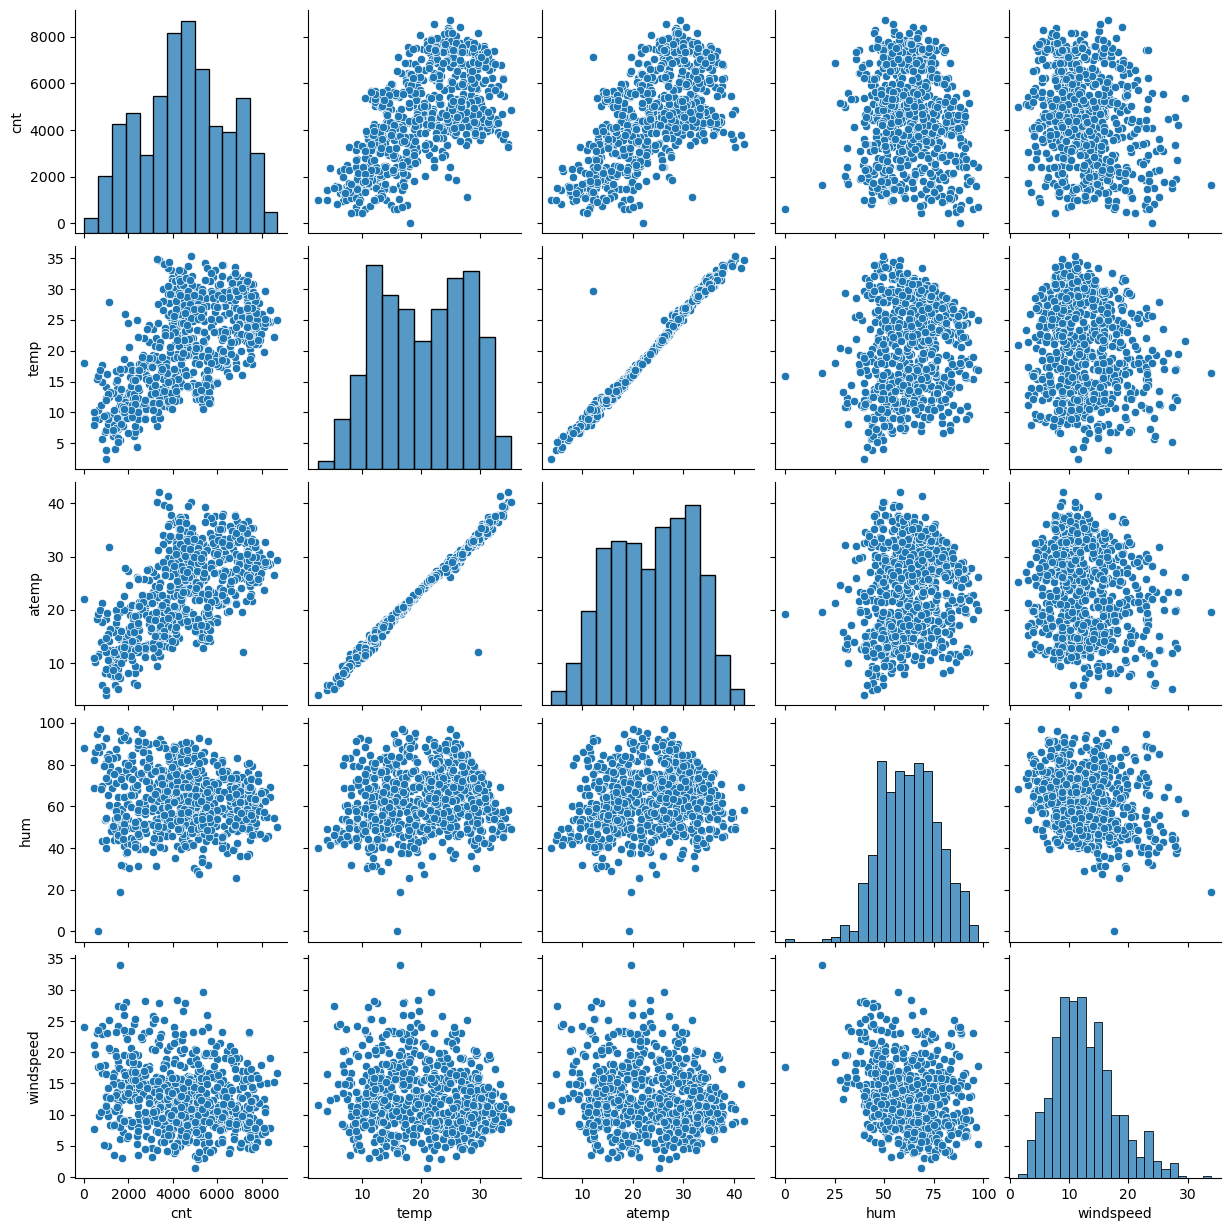

In [158]:
#Visualize Continuous variables or features
sns.pairplot(boom_bikes[['cnt','temp','atemp','hum','windspeed']])
plt.show()

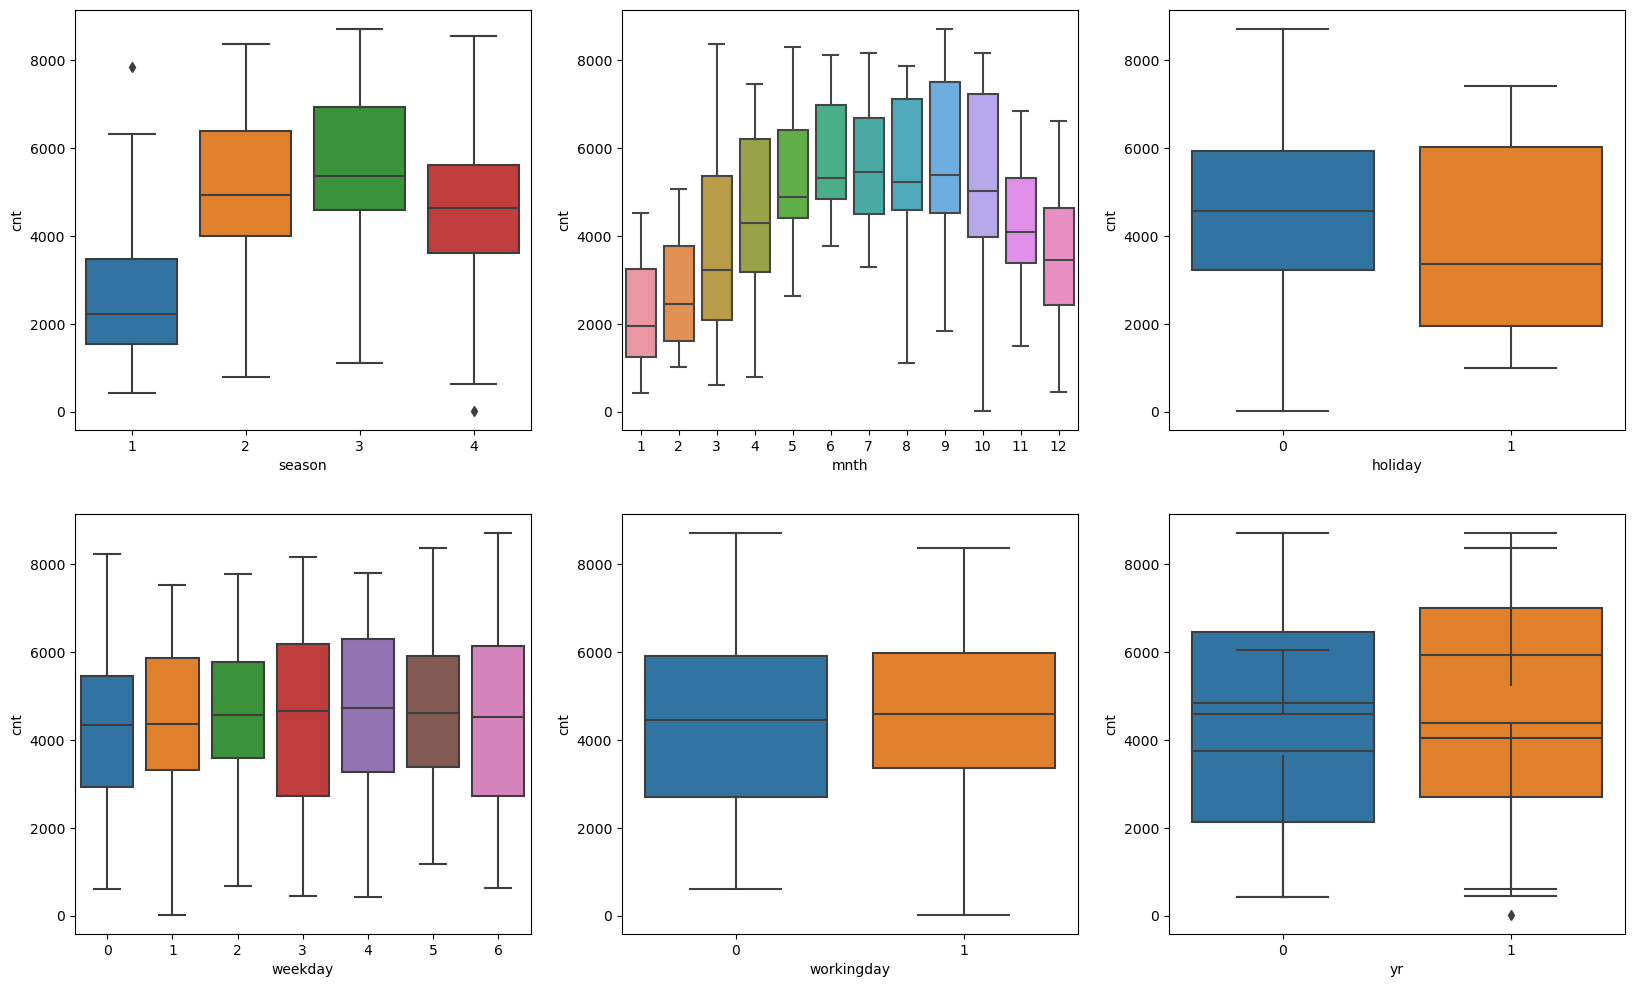

In [159]:
#Visualize Category variables or features
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_bikes)
plt.show()

# Step 3: Create Dummy variables
If there are categorical with some variations, the we can add dummy variable for variations of categorical variables.

If there are 'n' variations, then n-1 variables can be added.

After creating the dummy variable we need to merge them in actual dataframe.

In [160]:
# Create dummy for feature  season, weathersit and mnth  
boom_bikes['season'] = boom_bikes['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
boom_bikes['weathersit']=boom_bikes['weathersit'].map({1:"Good Climate",2:"Mist Climate",3:"Rainy Climate",4:"Bad Climate"})
boom_bikes['mnth']=boom_bikes['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May", 6:"Jun", 7:"Jul",8:"Aug", 9:"Sep", 10:"Oct",11:"Nov",12:"Dec"})

#Creating dummy variables for season, weathersit and mnth
season_status = pd.get_dummies(boom_bikes['season'], drop_first=True)
weathersit_status = pd.get_dummies(boom_bikes['weathersit'], drop_first=True)
mnth_status = pd.get_dummies(boom_bikes['mnth'], drop_first=True)

#droping the column weathersit, season and mnth as dummies has been created
boom_bikes = boom_bikes.drop(['weathersit','season','mnth'], axis=1)


#Merging the dummies variable with boom_bikes dataframes
boom_bikes = pd.concat([boom_bikes, season_status,weathersit_status,mnth_status], axis = 1)




## Step 4: Data Splitting in train and test data set


In [161]:
#Spliting the data into train and split
train_df,test_df=train_test_split(boom_bikes, train_size=0.7, random_state=100)

# Step 5: Rescaling the Features

In [162]:
#scaling the continuous variables
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt']
scaler = MinMaxScaler()
train_df[num_vars] = scaler.fit_transform(train_df[num_vars])
#train_df[num_vars].head()

#### Visualing the correlation of all the variable (including dummy and scaled and scaled)

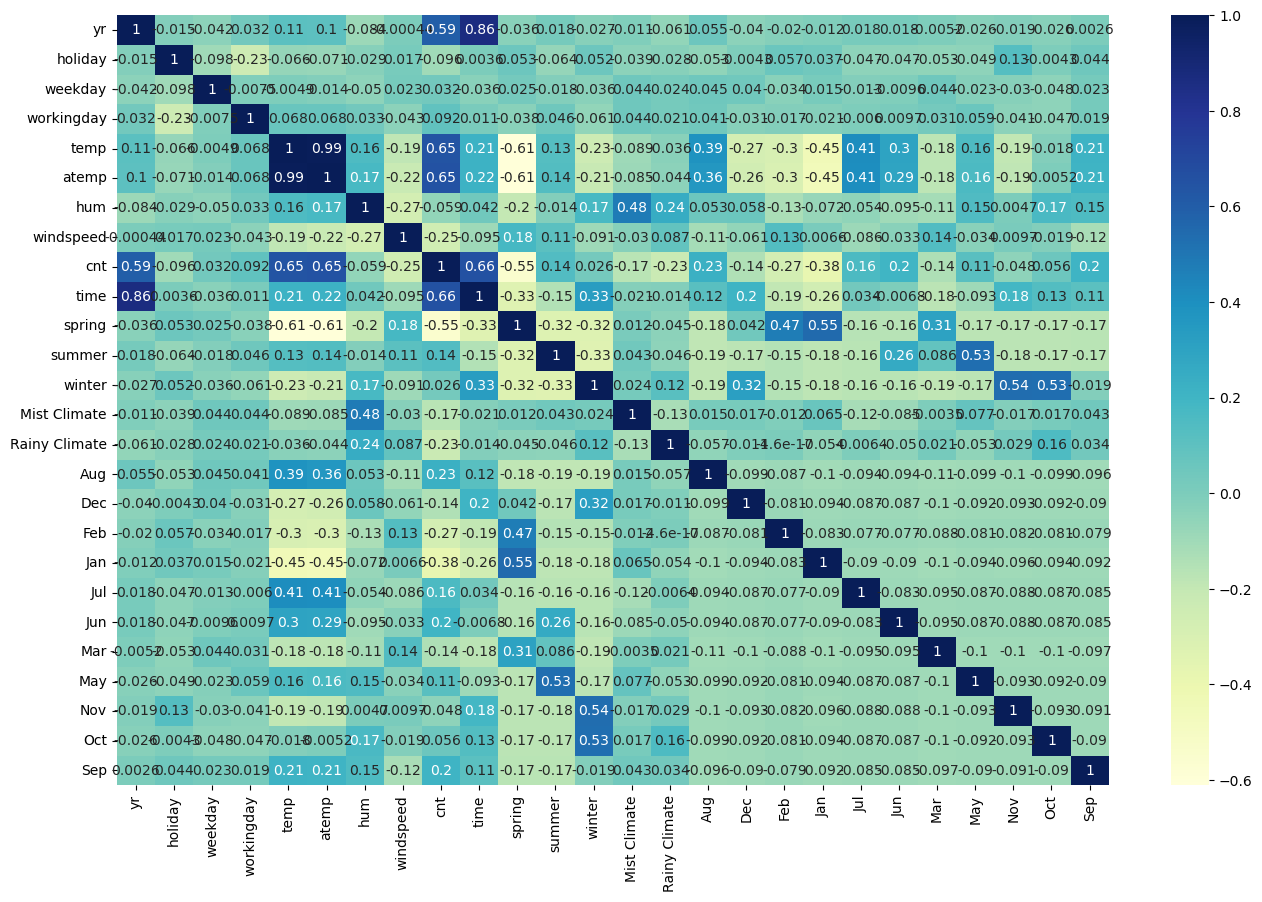

In [163]:
plt.figure(figsize = (16,10))
sns.heatmap(train_df.corr(),annot=True, cmap="YlGnBu")
plt.show()

## Step 6: Building a Linear model
Fit a regression line through the training data using statsmodels.

statsmodels fits a regression line passing through the origin, by default.

In [164]:
train_y = train_df.pop('cnt')
train_x = train_df
#print(train_y.shape)
#print(train_x.shape)

#### Some common functions for building lenear modal 

In [165]:
lm = LinearRegression()
def RFE_func(train_x, train_y,feature_cnt):    
    lm.fit(train_x, train_y)
    #print(lm)
    rfe = RFE(lm, n_features_to_select=feature_cnt)
    rfe = rfe.fit(train_x, train_y)
    list(zip(train_x.columns,rfe.support_,rfe.ranking_))
    return rfe #list(zip(train_x.columns,rfe.support_,rfe.ranking_))

def build_model(train_y,train_x):

    train_x=train_x.drop(['const'],axis=1)
    train_x=sm.add_constant(train_x_rfe)
    lm = sm.OLS(train_y,train_x).fit()
    print(lm.summary())
    return lm

def check_VIF(req_df):
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = req_df.copy(deep=True)
    X=X.drop(['const'],axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    #print(vif)

#### Automatic feature selection using RFE function. (Recurrsive feature elemination)

In [166]:
#Recurrsive feature elemination
rfe=RFE_func(train_x,train_y,25)
col=train_x.columns[rfe.support_]

In [167]:
train_x_rfe = train_x[col]
train_x_rfe=sm.add_constant(train_x_rfe)
#train_x_rfe.head()

In [168]:
build_model(train_y,train_x_rfe)
check_VIF(train_x_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.34e-183
Time:                        20:25:17   Log-Likelihood:                 526.51
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -890.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3044      0.064      4.791

,Features,VIF
8,time,1136.37
4,temp,440.96
0,yr,433.39
5,atemp,379.75
15,Dec,47.29
6,hum,41.42
22,Nov,41.35
23,Oct,31.54
24,Sep,21.93
14,Aug,20.66


In [169]:
train_x_rfe=train_x_rfe.drop(['Dec', 'Jul', 'Mar', 'May','Nov', 'Oct', 'Sep','Aug','Jun','atemp','hum','weekday','summer','workingday','holiday','time','Feb'],axis=1)
lm=build_model(train_y,train_x_rfe)
check_VIF(train_x_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     282.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.11e-180
Time:                        20:25:36   Log-Likelihood:                 473.83
No. Observations:                 510   AIC:                            -929.7
Df Residuals:                     501   BIC:                            -891.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2830      0.025     11.219

,Features,VIF
2,windspeed,3.91
1,temp,3.54
3,spring,2.22
0,yr,2.06
7,Jan,1.60
5,Mist Climate,1.50
4,winter,1.35
6,Rainy Climate,1.08


In [150]:
train_x_rfe=train_x_rfe.drop(['Feb'],axis=1)
lm=build_model(train_y,train_x_rfe)
check_VIF(train_x_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     282.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.11e-180
Time:                        20:24:09   Log-Likelihood:                 473.83
No. Observations:                 510   AIC:                            -929.7
Df Residuals:                     501   BIC:                            -891.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2830      0.025     11.219

,Features,VIF
2,windspeed,3.91
1,temp,3.54
3,spring,2.22
0,yr,2.06
7,Jan,1.60
5,Mist Climate,1.50
4,winter,1.35
6,Rainy Climate,1.08


## Step 7: Residual Analysis of the train data

<Axes: ylabel='Density'>

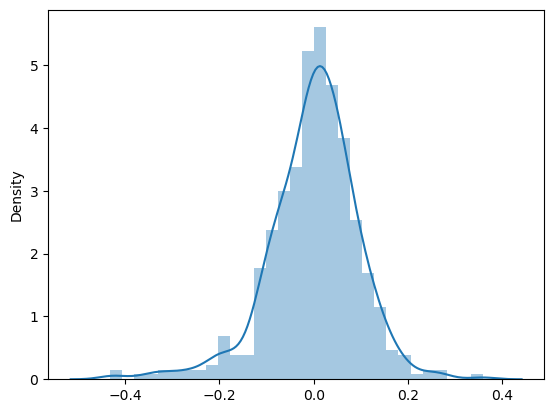

In [170]:
train_y_pred=lm.predict(train_x_rfe)
res=train_y - train_y_pred
sns.distplot(res)

## Step 8: Making Predictions Using the Final Model

In [171]:
#Making Predictions Using the Final Model
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt']
test_df_copy = test_df.copy(deep=True)

In [172]:
test_df[num_vars] = scaler.transform(test_df[num_vars])

In [143]:
#test_df.head()
#test_df.describe()

### Dividing into test_x and test_y

In [173]:
test_y = test_df.pop('cnt')
test_x = test_df

In [174]:
test_x_cnt=sm.add_constant(test_x)

In [175]:
test_x_cnt=test_x_cnt.drop(['Dec', 'Jul', 'Mar', 'May','Nov', 'Oct', 'Sep','atemp','hum','weekday','summer','workingday','holiday','Aug','Jun','time','Feb'],axis=1)

## Step 9: Model Evaluation

In [176]:
test_y_pred = lm.predict(test_x_cnt)

Text(0, 0.5, 'y_pred')

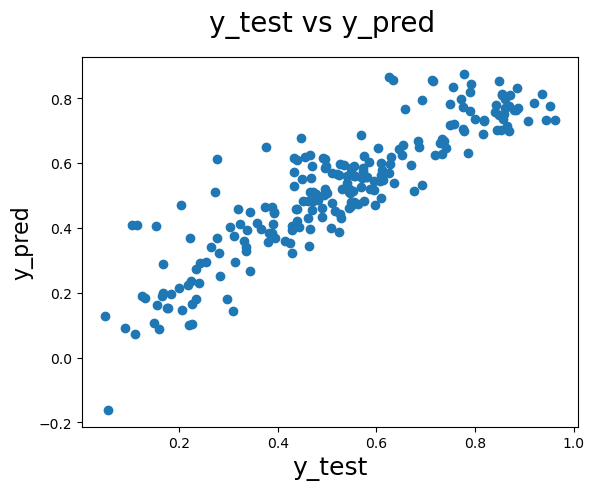

In [177]:
fig = plt.figure()
plt.scatter(test_y, test_y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

#### Evaluate using RSME value.
the value sholud be as close to zero

In [178]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(test_y, test_y_pred))

0.09923852498067227

#### Checking R_square value on test data

In [179]:
r_squared = r2_score(y_true=test_y, y_pred=test_y_pred)
r_squared

0.7940304665931015

### Best fit line equation

In [ ]:
bike_sharing_demand=0.2830+yr*0.2362+temp*0.4017+windspeed*-0.1559+spring*-0.1117+winter*0.0373+Mist Climate*-0.0721+Rainy Climate*-0.2790+Jan*-0.0490